In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

nut = pd.read_csv('/data/foodboost/nutritions.csv')
nut_pivot= nut.pivot_table(index='recipe', columns="nutrition", values="value", aggfunc="sum")
nut_pivot['eiwit'] = nut_pivot['eiwit'].str.replace('g', '').astype(float)
nut_pivot['vet'] = nut_pivot['vet'].str.replace('g', '').astype(float)
nut_pivot['koolhydraten'] = nut_pivot['koolhydraten'].str.replace('g', '').astype(float)
nut_pivot['energie'] = nut_pivot['energie'].str.replace('kcal', '').astype(float)
nut_pivot['natrium'] = nut_pivot['natrium'].str.replace('mg', '').astype(float)
nut_pivot['vezels'] = nut_pivot['vezels'].str.replace('g', '').astype(float)
nut_pivot['waarvan suikers'] = nut_pivot['waarvan suikers'].str.replace('g', '').astype(float)
nut_pivot['waarvan verzadigd'] = nut_pivot['waarvan verzadigd'].str.replace('g', '').astype(float)
nut_pivot= nut_pivot.fillna(0) 
nut_pivot

nutrition,eiwit,energie,koolhydraten,natrium,vet,vezels,waarvan suikers,waarvan verzadigd
recipe,,,,,,,,
Andijviestamppot met gebakken salami,25.0,630.0,36.0,1875.0,41.0,7.0,0.0,17.0
Bietensoep met selderijroom,3.0,160.0,11.0,1160.0,11.0,5.0,0.0,5.0
Libanese wraps met appel-koolsalade,21.0,440.0,45.0,440.0,18.0,9.0,0.0,3.0
Plaattaart met gegrilde groenten en witte kaas,16.0,550.0,38.0,760.0,35.0,8.0,11.0,16.0
Sticky cauliflower (gegrilde bloemkoolroosjes) van Jord Althuizen,8.0,235.0,16.0,800.0,14.0,6.0,0.0,2.0
...,...,...,...,...,...,...,...,...
Zweedse gehaktballetjes met room,33.0,640.0,26.0,520.0,45.0,2.0,0.0,22.0
Zweedse vegaballetjes met aardappel &amp; broccoli,38.0,770.0,76.0,1320.0,31.0,17.0,0.0,10.0
Zwitserse kaasfondue,56.0,850.0,7.0,920.0,63.0,0.0,5.0,38.0


In [120]:
# oude methode 17-2-23   
# def is_gezond(recept):
#    return (recept['energie'] < 500 and 
#            recept['waarvan suikers'] < 10 and 
#            recept['waarvan verzadigd'] < 10) or \
#           (recept['eiwit'] >= 10 and 
#            recept['vezels'] >= 3 and 
#            recept['natrium'] < 500) or \
#           (recept['koolhydraten'] < 50 and 
#            recept['vet'] < 4)

recepten = nut_pivot

# hier defineer ik wanneer een recept gezond is 
def get_gezonde_score(recept):
    score = 1
    
    # Criteria 1
    if recept['energie'] < 500 and recept['waarvan suikers'] < 10 and recept['waarvan verzadigd'] < 25:
        score += 2
    if recept['energie'] < 750 and recept['koolhydraten'] < 65 and recept['vezels'] >= 5:
        score += 1
    if recept['energie'] < 1000 and recept['eiwit'] > 15 and recept['vezels'] >= 10:
        score += 1
    
    # Criteria 2
    if recept['eiwit'] >= 10 and recept['waarvan suikers'] < 30 and recept['vet'] < 40:
        score += 2
    if recept['eiwit'] >= 10 and recept['koolhydraten'] < 75 and recept['vezels'] >= 10:
        score += 1
    if recept['eiwit'] >= 10 and recept['vezels'] >= 10 and recept['natrium'] < 1000:
        score += 1
    
    # Criteria 3
    if recept['koolhydraten'] < 50 and recept['vet'] < 15:
        score += 1
        
    return score

recepten['gezonde_score'] = recepten.apply(get_gezonde_score, axis=1)


# de data splits op in een trainings- en een testset
train_data, test_data = train_test_split(recepten, test_size=0.2, random_state=42)
features = ['eiwit', 'vet', 'koolhydraten',] 
target = 'gezonde_score'  

# training
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_data[features], train_data[target])

# testset
test_data['voorspelling_gezonde_score'] = rf.predict(test_data[features])

# de prestaties van het model evalueren met behulp van mean squared error
mse = mean_squared_error(test_data[target], test_data['voorspelling_gezonde_score'])
print(f"Mean squared error: {mse}")

recepten = recepten.assign(voorspelling_gezonde_score=rf.predict(recepten[features]).round(0))

Mean squared error: 1.4906831399134983


In [121]:
recepten

nutrition,eiwit,energie,koolhydraten,natrium,vet,vezels,waarvan suikers,waarvan verzadigd,gezonde_score,voorspelling_gezonde_score
recipe,,,,,,,,,,
Andijviestamppot met gebakken salami,25.0,630.0,36.0,1875.0,41.0,7.0,0.0,17.0,2,4.0
Bietensoep met selderijroom,3.0,160.0,11.0,1160.0,11.0,5.0,0.0,5.0,5,4.0
Libanese wraps met appel-koolsalade,21.0,440.0,45.0,440.0,18.0,9.0,0.0,3.0,6,6.0
Plaattaart met gegrilde groenten en witte kaas,16.0,550.0,38.0,760.0,35.0,8.0,11.0,16.0,4,4.0
Sticky cauliflower (gegrilde bloemkoolroosjes) van Jord Althuizen,8.0,235.0,16.0,800.0,14.0,6.0,0.0,2.0,5,5.0
...,...,...,...,...,...,...,...,...,...,...
Zweedse gehaktballetjes met room,33.0,640.0,26.0,520.0,45.0,2.0,0.0,22.0,1,1.0
Zweedse vegaballetjes met aardappel &amp; broccoli,38.0,770.0,76.0,1320.0,31.0,17.0,0.0,10.0,4,4.0
Zwitserse kaasfondue,56.0,850.0,7.0,920.0,63.0,0.0,5.0,38.0,1,1.0


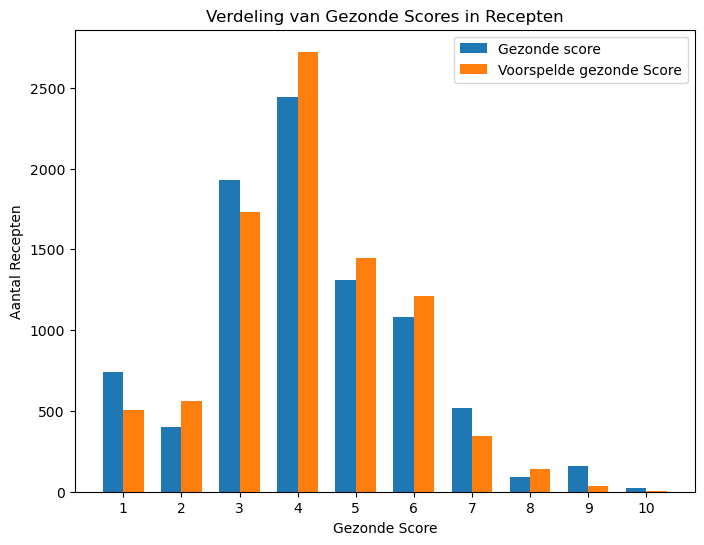

In [122]:

# Bepaal de aantallen per score
aantallen_gezond = recepten['gezonde_score'].value_counts().sort_index()
aantallen_voorspeld = recepten['voorspelling_gezonde_score'].value_counts().sort_index()

# X-coördinaten voor de barplots
x_gezond = np.arange(len(aantallen_gezond))
x_voorspeld = np.arange(len(aantallen_voorspeld))

# Breedte van de bars
breedte = 0.35

# Maak de plot
fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x_gezond - breedte/2, aantallen_gezond, breedte, label='Gezonde score')
rects2 = ax.bar(x_voorspeld + breedte/2, aantallen_voorspeld, breedte, label='Voorspelde gezonde Score')

# Voeg labels en titels toe
ax.set_xlabel('Gezonde Score')
ax.set_ylabel('Aantal Recepten')
ax.set_title('Verdeling van Gezonde Scores in Recepten')
ax.set_xticks(x_gezond)
ax.set_xticklabels(range(1, len(aantallen_gezond)+1))
ax.legend()

# Laat de plot zien
plt.show()

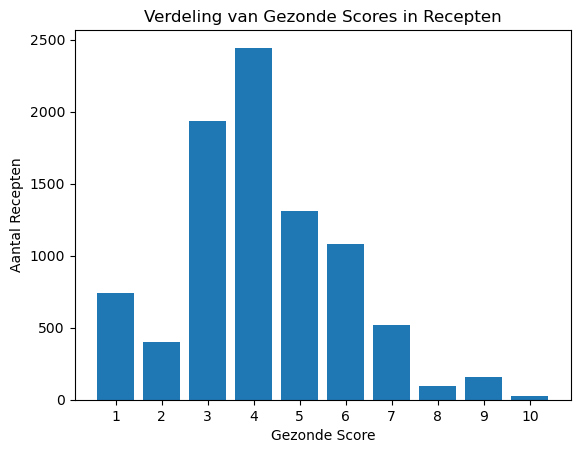

In [113]:
# Totaal aantal recepten per gezonde score
scores = recepten['gezonde_score'].value_counts().sort_index()

# Maak een barplot
plt.bar(scores.index, scores.values)

# Labels en titels toevoegen
plt.xlabel('Gezonde Score')
plt.ylabel('Aantal Recepten')
plt.title('Verdeling van Gezonde Scores in Recepten')

# X-as instellen
plt.xticks(range(1, 11))

# Plot tonen
plt.show()

Text(0.5, 0.98, 'Verschillen tussen gezonde en niet-gezonde recepten')

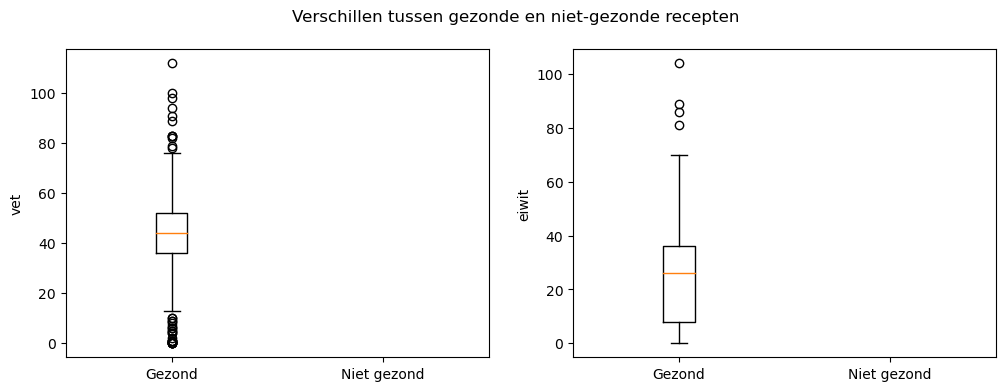

In [117]:
gezond_recepten = recepten[recepten['gezonde_score'] == 1]
ongezond_recepten = recepten[recepten['gezonde_score'] == 0]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axes[0].boxplot([gezond_recepten['vet'], ongezond_recepten['vet']])
axes[0].set_xticklabels(['Gezond', 'Niet gezond'])
axes[0].set_ylabel('vet')
axes[1].boxplot([gezond_recepten['eiwit'], ongezond_recepten['eiwit']])
axes[1].set_xticklabels(['Gezond', 'Niet gezond'])
axes[1].set_ylabel('eiwit')
fig.suptitle('Verschillen tussen gezonde en niet-gezonde recepten')
